In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
def rgb_to_grayscale(rgb_image):
    height, width, _ = rgb_image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image[i, j]
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            gray_image[i, j] = gray_value

    return gray_image

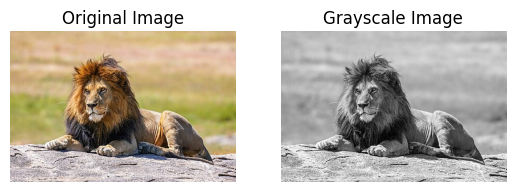

In [25]:
# Function to read and convert PNG image
def load_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    return image

def rgb_to_grayscale(rgb_image):
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

# Load a PNG image
image_path = 'Lion.jpg'
rgb_image = load_image(image_path)

# Convert to grayscale
gray_image = rgb_to_grayscale(rgb_image)

# Display the original and grayscale images
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [26]:
# Function to create a Gaussian kernel
def gaussian_kernel(size, sigma=1):
    """Generates a 2D Gaussian kernel."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Function to perform convolution
def convolve(image, kernel):
    """Convolves an image with a kernel."""
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Initialize the output image
    output = np.zeros_like(image)
    
    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Element-wise multiplication and sum
            output[i, j] = np.sum(region * kernel)
    
    return output

In [27]:
# Create a 5x5 Gaussian kernel with sigma=1
kernel_size = 5
sigma = 1
gaussian_k = gaussian_kernel(kernel_size, sigma)

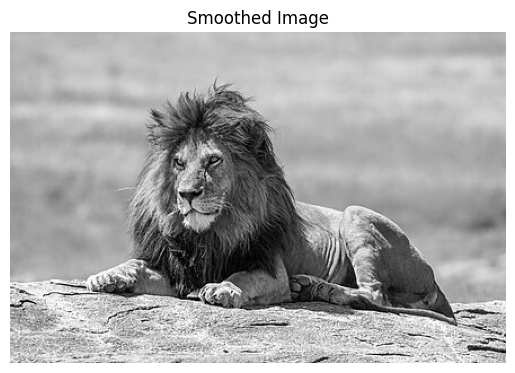

In [28]:
# Display the smoothed image
plt.imshow(gray_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.show()

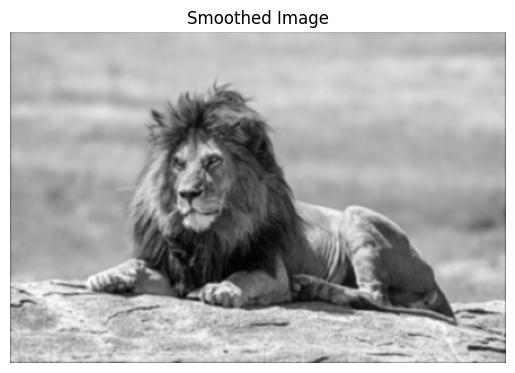

In [29]:
# Apply Gaussian smoothing
smoothed_image = convolve(gray_image, gaussian_k)

# Display the smoothed image
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.show()

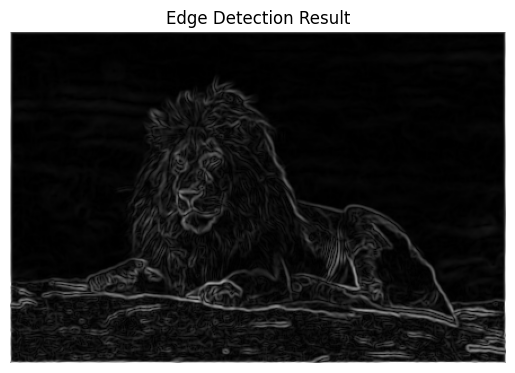

In [30]:
# Define Sobel kernels
Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

# Compute gradients along the x and y axes
Gx = convolve(smoothed_image, Kx)
Gy = convolve(smoothed_image, Ky)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

# Normalize the gradient magnitude to range [0, 255]
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Display the gradient magnitude image
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Edge Detection Result')
plt.axis('off')
plt.show()